In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.pyplot as plt




In [2]:
x_min = -10
x_max = 10
y_min = -10
y_max = 10
nx = 512
ny = 512

def potential(x, y):
   
    return 3 * y * (y >= -8) + 40 * (y < -8)


def init_wavefunction(x, y, sigma_x = 0.5, sigma_y = 0.5, k_x = 5.0, k_y = 0.0, x0 = -5.0, y0 = 0):
    norm = 1.0/np.sqrt(sigma_x*sigma_y*np.pi)
    return np.exp(-(x-x0)**2/(2*sigma_x) - (y-y0)**2/(2*sigma_y) + 1j*k_x*x + 1j*k_y*y) * norm

In [3]:
sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_initial_condition(lambda x, y: init_wavefunction(x, y))
sim.set_mass(10.0)
sim.set_potential(lambda x, y: potential(x,y))
sim.set_grid([x_min, y_min], [x_max, y_max], [nx, ny])
sim.set_time_parameters(0.0, 20.0, 8000)
sim.prepare()






ic| message: 'Dimension set to 2'
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function <lambda> at 0x104c4d510>
ic| message: 'Grid set.'
ic| self.a: array([-10., -10.])
    self.b: array([10., 10.])
    self.n: array([512, 512])
ic| 'Time parameters set.'
ic| self.t0: 0.0, self.t1: 20.0, self.n_steps: 8000
ic| 'Using given initial condition function. '


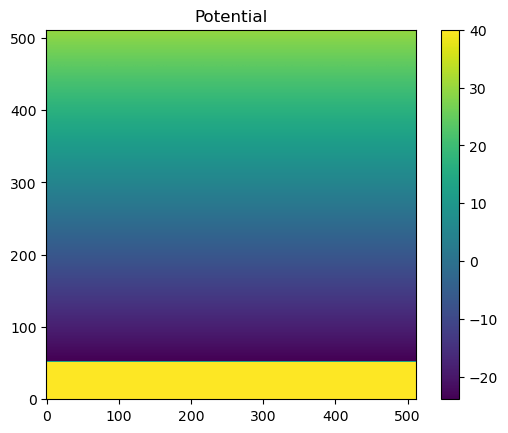

In [4]:
plt.figure()
plt.imshow(sim.ham.V.T, origin='lower')
plt.title('Potential')
plt.colorbar()
plt.show()

In [6]:
anim1 = Animator2d(sim, name='gravity_complex')
anim1.set_style(DarkTheme())
anim1.vis_type = 'complex'
anim1.show_axis = False


anim2 = Animator2d(sim, name='gravity_magnitude')
anim2.set_style(DarkTheme())
anim2.vis_type = 'magnitude'
anim2.show_axis = False

anim1.set_interval(10)
anim1.set_framesize(1024, 1024)
anim2.set_interval(10)
anim2.set_framesize(1024, 1024)

# initialize figure, and add potential visualization
anim1.init_figure()
anim1.add_potential_visualization_2d(transparent_range=[-50,39])
anim2.init_figure()
anim2.add_potential_visualization_2d(transparent_range=[-50,39])


anim_callback1 = anim1.get_callback()
anim_callback2 = anim2.get_callback()

def callback(sim):
    anim_callback1(sim)
    anim_callback2(sim)
    
sim.simulate(callback=callback)
anim1.make_movie("gravity.mp4")
anim1.clean_frames()
anim2.make_movie("gravity_magnitude.mp4")
anim2.clean_frames()

ic| self.name: 'gravity'
ic| self.folder: './gravity_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './gravity_frames/frame%06d.png'
ic| self.name: 'gravity'
ic| self.folder: './gravity_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './gravity_frames/frame%06d.png'
ic| self.fig_width_pixels: 1024
    self.fig_height_pixels: 1024
    self.fig_width: 10
    self.fig_height: 10.0
    self.dpi: 102.4
ic| self.fig_width_pixels: 1024
    self.fig_height_pixels: 1024
    self.fig_width: 10
    self.fig_height: 10.0
    self.dpi: 102.4
ic| 'inside mpl_style'
ic| animator.py:673 in get_extent() at 13:57:18.604
ic| x_range.shape: (512,), y_range.shape: (512,)
ic| extent: [-10.0, 9.9609375, -10.0, 9.9609375]
ic| self.caption_font: <matplotlib.font_manager.FontProperties object at 0x

  0%|          | 0/8000 [00:00<?, ?it/s]

KeyboardInterrupt: 